In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = 'winequalityN.csv'
dt = pd.read_csv(path)
print (dt.head(5))

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [ ]:
dt.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [ ]:
for col in dt.columns:
  if dt[col].isnull().sum() > 0:
    dt[col] = dt[col].fillna(dt[col].mean())

dt.isnull().sum().sum()

0

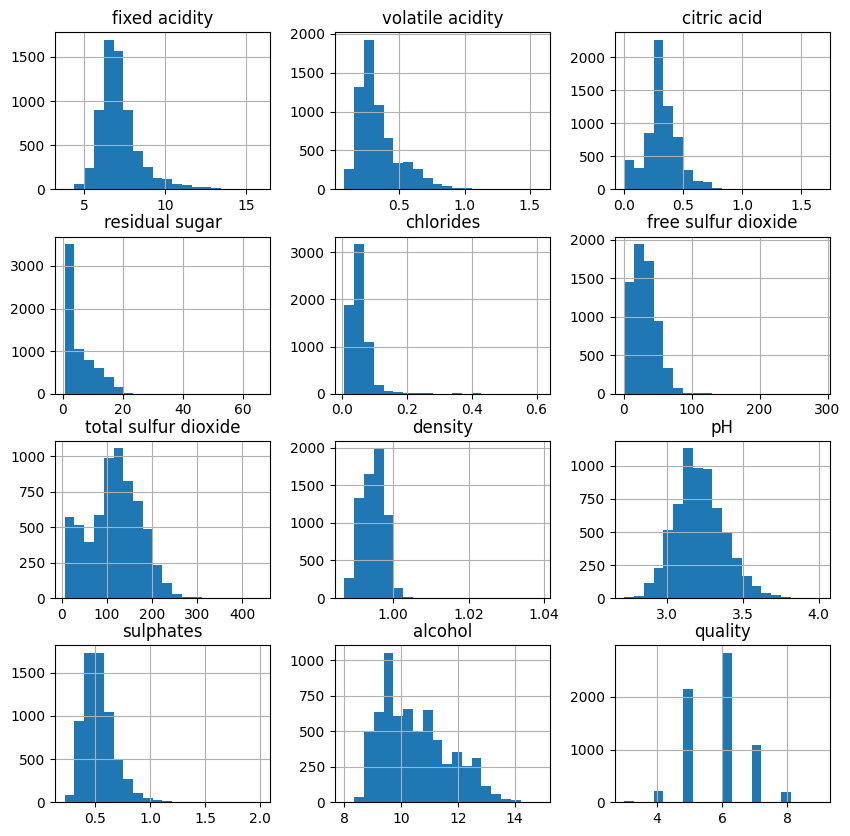

In [ ]:
dt.hist(bins=20, figsize=(10,10))
plt.show()

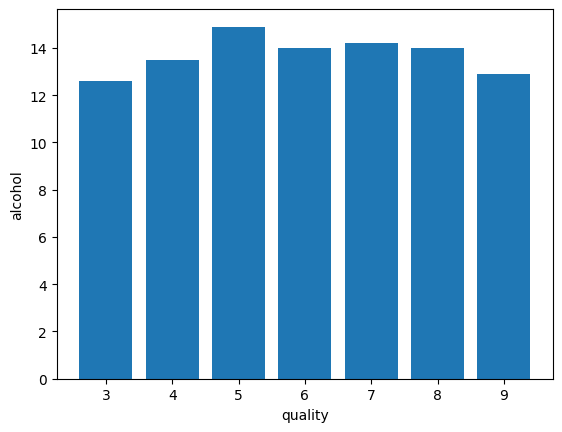

In [ ]:
plt.bar(dt['quality'], dt['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

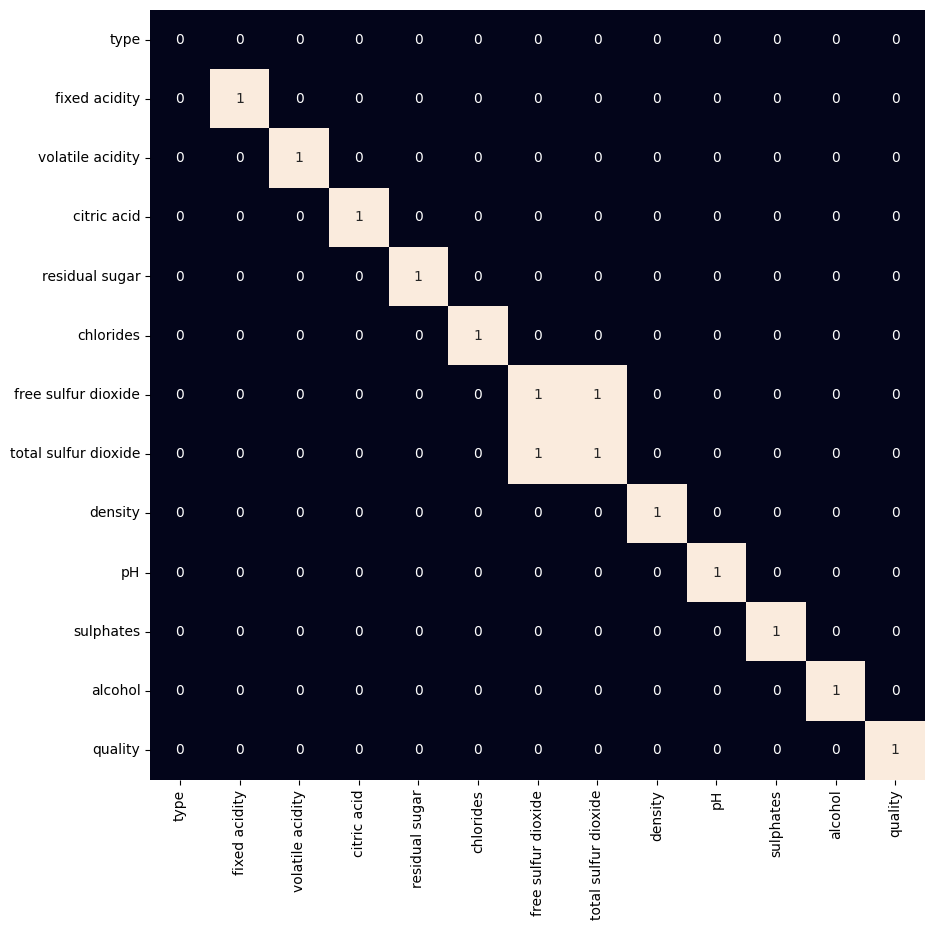

In [ ]:
# Converting 'object' columns to numerical if they represent numbers
for col in dt.columns:
  if dt[col].dtype == 'object':
    try:
        dt[col] = pd.to_numeric(dt[col], errors='coerce')
    except:
        pass

plt.figure(figsize=(10,10))
sns.heatmap(dt.corr()>0.7, annot=True, cbar=False)
plt.show


In [ ]:
dt = dt.drop('total sulfur dioxide', axis=1)


In [ ]:
#Model Developmet

dt['best quality'] = [1 if x >5 else 0 for x in dt['quality']]

In [ ]:
dt.replace({'white': 1, 'red': 0}, inplace=True)

In [ ]:
features = dt.drop(['quality', 'best quality'], axis=1)
features = features.fillna(features.mean())

target = dt['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
xtrain = imputer.fit_transform(xtrain)
xtest = imputer.transform(xtest)

xtrain.shape, xtest.shape

((5197, 10), (1300, 10))

In [ ]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [ ]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
    models[i].fit(xtrain, ytrain)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        ytest, models[i].predict(xtest)))
    print()


LogisticRegression() : 
Training Accuracy :  0.6968344278667192
Validation Accuracy :  0.6865607216926675

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9762240429934201
Validation Accuracy :  0.8045662590288206

SVC() : 
Training Accuracy :  0.7203202525576721


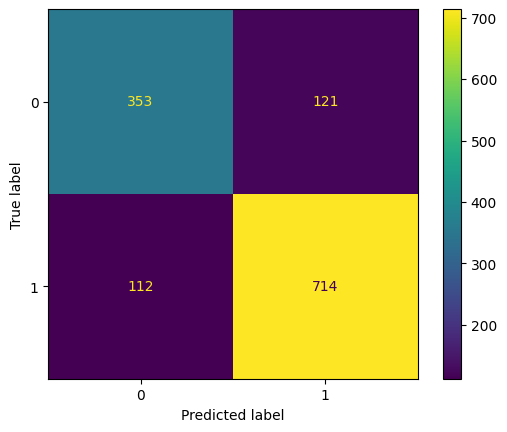

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(ytest, models[1].predict(xtest))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[1].classes_)
disp.plot()
plt.show()




In [ ]:
print(metrics.classification_report(ytest, models[1].predict(xtest)))


              precision    recall  f1-score   support

           0       0.76      0.74      0.75       474
           1       0.86      0.86      0.86       826

    accuracy                           0.82      1300
   macro avg       0.81      0.80      0.81      1300
weighted avg       0.82      0.82      0.82      1300



In [ ]:
from sklearn.metrics import accuracy_score

for i in range(3):
    ytrain_pred = models[i].predict(xtrain)
    ytest_pred = models[i].predict(xtest)
    print(f'{models[i]} : ')
    print('Training Accuracy : ', accuracy_score(ytrain, ytrain_pred))
    print('Validation Accuracy : ', accuracy_score(ytest, ytest_pred))
    print()


LogisticRegression() : 
Training Accuracy :  0.7358091206465268
Validation Accuracy :  0.7330769230769231

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9792187800654224
Validation Accuracy :  0.8207692307692308

SVC() : 
Training Accuracy :  0.7602462959399654


In [ ]:
! pip install streamlit pandas numpy scikit-learn matplotlib seaborn xgboost


In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.118.240.111


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.118.240.111:8501

⠼⠴⠦your url is: https://funny-schools-check.loca.lt
/content/app.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt.replace({'white': 1, 'red': 0}, inplace=True)
/content/app.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt.replace({'white': 1, 'red': 0}, inplace=True)
/content/app.py:39: FutureWarning: Downcasting behavior in `replace` is de

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
st.title("Wine Quality Prediction")
st.write("This app predicts whether the wine is of the best quality based on various features.")

uploaded_file = st.file_uploader("Upload your dataset", type=["csv"])

if uploaded_file is not None:
    dt = pd.read_csv(uploaded_file)
    
    # Data preprocessing
    st.subheader("Dataset Overview")
    st.write("First 5 rows of the dataset:")
    st.write(dt.head(5))
    
    # Handling missing values
    for col in dt.columns:
        if dt[col].isnull().sum() > 0:
            dt[col] = dt[col].fillna(dt[col].mean())
    
    # Drop unnecessary columns
    if 'total sulfur dioxide' in dt.columns:
        dt = dt.drop('total sulfur dioxide', axis=1)
    
    # Adding a target column
    dt['best quality'] = [1 if x > 5 else 0 for x in dt['quality']]
    dt.replace({'white': 1, 'red': 0}, inplace=True)
    
    # Check for class imbalance
    class_counts = dt['best quality'].value_counts()
    st.write("Class distribution:")
    st.bar_chart(class_counts)
    
    # Splitting features and target
    features = dt.drop(['quality', 'best quality'], axis=1)
    target = dt['best quality']
    
    xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)
    
    # Handling missing values and scaling
    imputer = SimpleImputer(strategy='mean')
    xtrain = imputer.fit_transform(xtrain)
    xtest = imputer.transform(xtest)
    
    norm = MinMaxScaler()
    xtrain = norm.fit_transform(xtrain)
    xtest = norm.transform(xtest)
    
    # Model Training
    models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
    model_names = ["Logistic Regression", "XGBoost Classifier", "Support Vector Machine"]
    
    model_selection = st.selectbox("Select a Model for Prediction", model_names)
    selected_model = models[model_names.index(model_selection)]
    selected_model.fit(xtrain, ytrain)
    
    # Model Evaluation
    ytest_pred = selected_model.predict(xtest)  # Predict on test data
    cm = metrics.confusion_matrix(ytest, ytest_pred)
    st.subheader("Confusion Matrix")
    st.write(cm)
    
    # Visualizing the confusion matrix
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    st.pyplot(fig)
    
    # Input section for prediction
    st.subheader("Make a Prediction")
    st.write("Enter values for each feature below:")
    
    user_input = {}
    for feature in features.columns:
        if feature == "type":
            user_input[feature] = st.selectbox("Type of wine (red/white)", options=["red", "white"])
            user_input[feature] = 1 if user_input[feature] == "white" else 0
        else:
            user_input[feature] = st.number_input(f"{feature}", value=float(features[feature].mean()))
    
    if st.button("Predict"):
        # Convert input to a dataframe
        input_df = pd.DataFrame([user_input])
        
        # Apply preprocessing to the input
        input_df = imputer.transform(input_df)
        input_df = norm.transform(input_df)
        
        # Make a prediction
        prediction = selected_model.predict(input_df)
        result = "Best Quality" if prediction[0] == 1 else "Not Best Quality"
        
        st.subheader("Prediction Result")
        st.write(f"The wine is predicted to be: **{result}**")
